# Guía 6 - Ejercicio 7
En primer lugar se visualizan las imágenes y para identificar el ruido se toma una pequeña porción de la imagen de intensidad constante y se realiza su histograma, a partir de esto se identifica cada tipo de ruido y su filtro correspondiente para limpiar la imagen. Se identifican los ruidos:
- Gaussiano
- Uniforme
- Impulsivo

Dados estos ruidos se utilizaron los filtros de fastNlDenoising y mediana. A través del primero se eligieron los mejores parámetros para cada imagen A y B y se obtuvo una imagen de salida. Luego, para la imagen c se utilizó el filtro de mediana.

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def trackbar_transformacion(imagen, variables_trackbar, parametros_trackbar, transformacion):
    imagen_original = imagen.copy()
    NOMBRE_VENTANA = 'Trackbars'
    def on_trackbar(value):
        valores_trackbar = [cv.getTrackbarPos(var, NOMBRE_VENTANA) for var in variables_trackbar]
        
        imagen_transformada = transformacion(imagen_original, valores_trackbar)

        imagen_transformada_normalizada = cv.normalize(imagen_transformada,None,0,255,cv.NORM_MINMAX)

        imagen_resultado = cv.convertScaleAbs(imagen_transformada_normalizada)

        cv.imshow('Imagen Original', imagen)
        cv.imshow('Imagen Transformada', imagen_resultado)

    cv.namedWindow(NOMBRE_VENTANA)

    for i, var in enumerate(variables_trackbar):
        cv.createTrackbar(var, NOMBRE_VENTANA, parametros_trackbar[i][0], parametros_trackbar[i][1], on_trackbar)

    on_trackbar(0)

    cv.waitKey(0)
    cv.destroyAllWindows()

def mostrar_imagenes(imagenes):
    num_imagenes = len(imagenes)
    fig1, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))
    
    for i, imagen in enumerate(imagenes):
        imagen_rgb = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)  # Convertir la imagen a RGB para Matplotlib
        axs[i].imshow(imagen_rgb)
        axs[i].axis('off')  # Ocultar ejes
        
    plt.show()

def graficar_histogramas_subplots(histogramas):
    """
    Grafica los histogramas en subplots.

    Args:
        histogramas (list): Lista de histogramas (cada histograma como un arreglo numpy).
    """
    num_imagenes = len(histogramas)
    fig, axs = plt.subplots(1, num_imagenes, figsize=(6*num_imagenes, 6))

    for i, hist in enumerate(histogramas):
        axs[i].bar(range(256), hist, width=1, edgecolor='none')
        axs[i].set_xlim(-5, 260)
        axs[i].set_title(f"Histograma de Imagen {i+1}")
        axs[i].set_xlabel("Intensidad de píxeles")
        axs[i].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()
def calcular_histogramas(imagenes):
    """
    Calcula los histogramas para un arreglo de imágenes.
    """
    histogramas = []
    for img in imagenes:
        # Convierte la imagen a escala de grises si es a color
        if len(img.shape) == 3:
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        # Calcula el histograma
        hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))
        histogramas.append(hist)
    return histogramas

imagenA = cv.imread("Imagenes/FAMILIA_a.jpg", cv.IMREAD_GRAYSCALE)
imagenB = cv.imread("Imagenes/FAMILIA_b.jpg", cv.IMREAD_GRAYSCALE)
imagenC = cv.imread("Imagenes/FAMILIA_c.jpg", cv.IMREAD_GRAYSCALE)

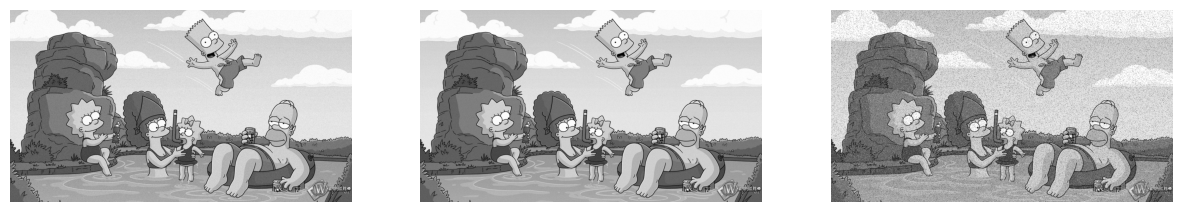

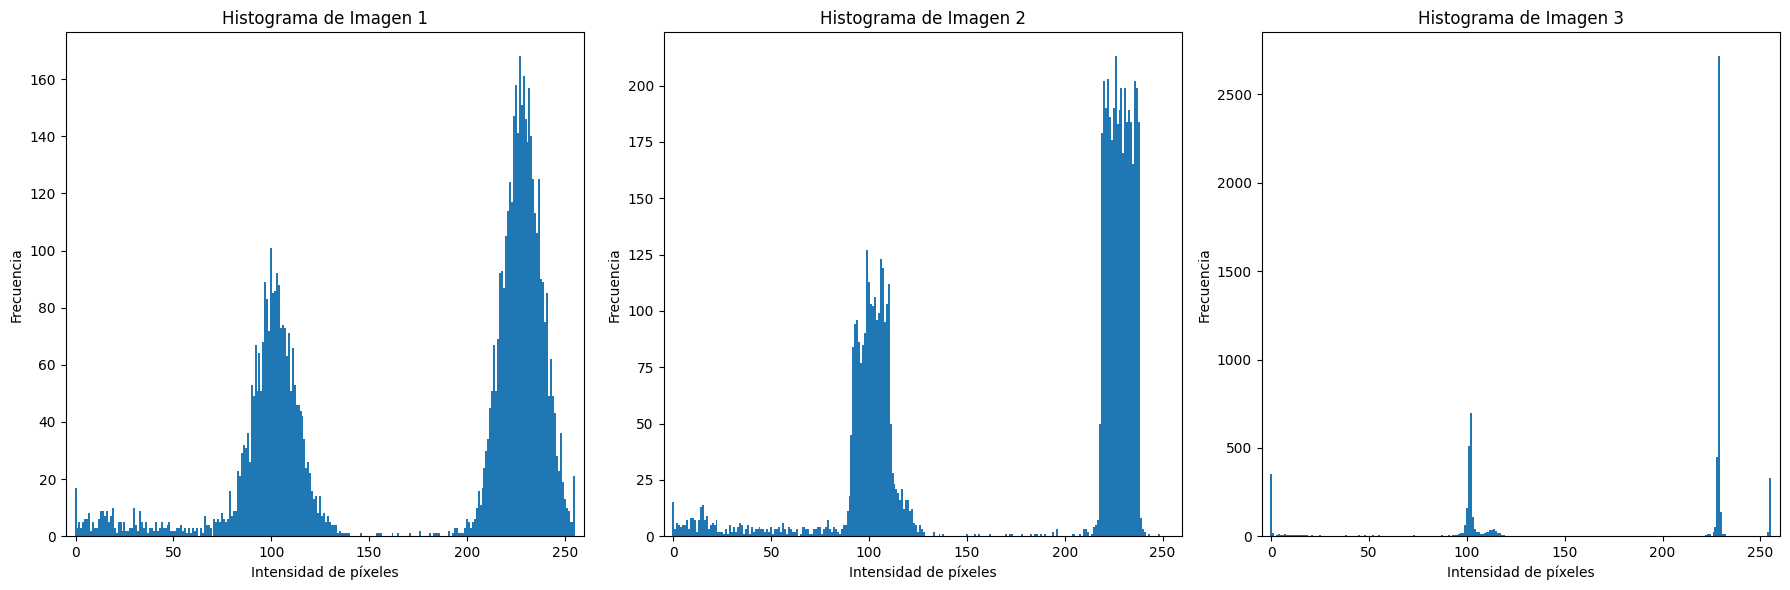

In [18]:
mostrar_imagenes([imagenA, imagenB, imagenC])
histogramas = calcular_histogramas([imagenA[600:650,20:150], imagenB[600:650,20:150], imagenC[600:650,20:150]])
graficar_histogramas_subplots(histogramas)
 
# Identificación de tipo de ruido
#imagen A -> ruido gaussiano
#imagen B -> ruido uniforme
#imagen C -> ruido sal y pimienta

# Elección de filtro
# fastNlMeansDenoising() #Funciona bien contra ruido impulsivo y Gaussiano 
    #h: (más alto más ruido saca pero más imagen se pierde, 10 ta ok)
    #hForColorComponents: lo mismo pero para cada color
    #templateWindowSize: debe ser impar (7 recomendado)
    #searchWindowSize: debe ser impar (21 recomendado)


## Imagen A

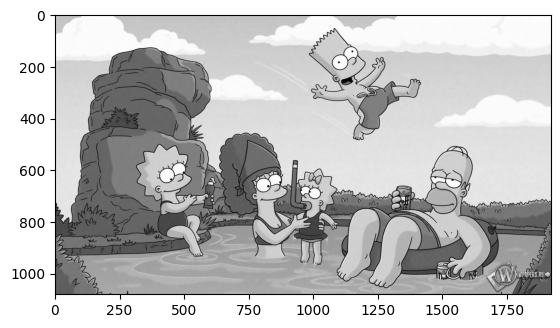

In [19]:
trackbar = False
if trackbar:
    variables_trackbar = ['h', 'templateWindowSize', 'searchWindowSize']

    parametros_trackbar = [[1,100],[3,21],[3,21]]

    def transformacion(imagen, valores_trackbar):
        h = valores_trackbar[0]
        templateWindowSize = valores_trackbar[1]
        searchWindowSize = valores_trackbar[2]
        imagen_filtrada = cv.fastNlMeansDenoising(imagen,None,h,templateWindowSize,searchWindowSize)
        return imagen_filtrada

    trackbar_transformacion(imagenA,variables_trackbar, parametros_trackbar, transformacion)

# Se identificaron los mejores parámetros
imagen_filtrada = cv.fastNlMeansDenoising(imagenA,None,18,7,11)
plt.imshow(imagen_filtrada, cmap='gray')
plt.show()

## Imagen B

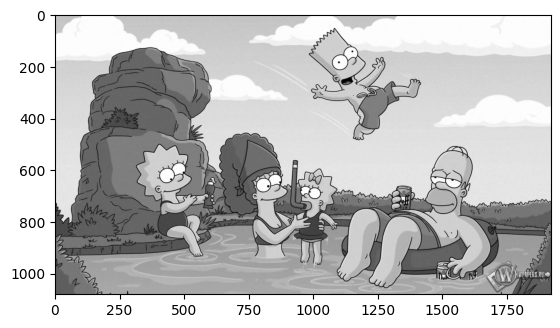

In [20]:
trackbar = False
if trackbar:
    variables_trackbar = ['h', 'templateWindowSize', 'searchWindowSize']

    parametros_trackbar = [[1,100],[3,21],[3,21]]

    def transformacion(imagen, valores_trackbar):
        h = valores_trackbar[0]
        templateWindowSize = valores_trackbar[1]
        searchWindowSize = valores_trackbar[2]
        imagen_filtrada = cv.fastNlMeansDenoising(imagen,None,h,templateWindowSize,searchWindowSize)
        return imagen_filtrada

    trackbar_transformacion(imagenB,variables_trackbar, parametros_trackbar, transformacion)

# Mejores parámetros 
imagen_filtrada = cv.fastNlMeansDenoising(imagenB,None,29,4,5)
plt.imshow(imagen_filtrada, cmap='gray')
plt.show()

## Imagen C
Mejor parámetro es mediana con ksize=3

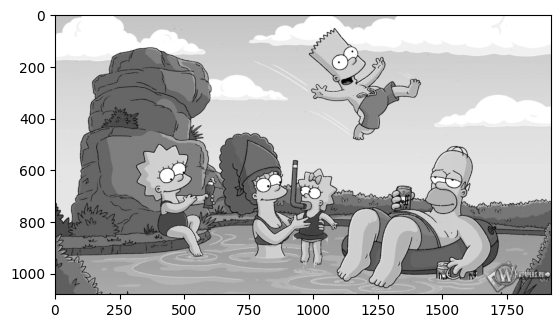

In [21]:
trackbar = False
if trackbar:
    variables_trackbar = ['k_size']
    parametros_trackbar = [[1,30]]
    def transformacion(imagen, valores_trackbar):
        k_size = valores_trackbar[0]
        imagen_filtrada = cv.medianBlur(imagen, k_size)
        return imagen_filtrada

    trackbar_transformacion(imagenC,variables_trackbar, parametros_trackbar, transformacion)

imagen_salida = cv.medianBlur(imagenC,3)
plt.imshow(imagen_salida, cmap='gray')
plt.show()